## 1 - Packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement**: You are a machine learning engineer at a mall that wants to segment its users to some categories. The mall has given you an information about its users to cluster them, so the mall can direct its advertisments to the target users who will increase mall's profit.

Let's get more familiar with the dataset.

In [5]:
# Loading dataset
dataset = pd.read_csv('mall.csv')
dataset.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [7]:
dataset.size

600

In [8]:
df = pd.DataFrame(data= dataset, columns= dataset.columns)
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


### Now, you're going to cluster mall's users to help the mall to find the target segment of users who will increase the mall's profit.
    
### Let's go :)

### Find Optimal number of Clusters

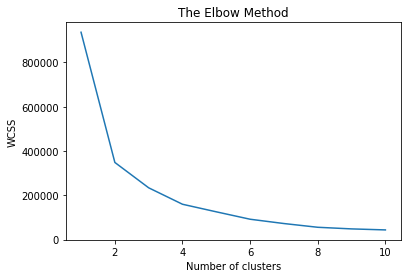

In [9]:
from sklearn.cluster import KMeans
wcss = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(clusters_range, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**From the Elbow method graph, the optimal number of clusters = 5**

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [22]:
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

### Visulaize the clusters

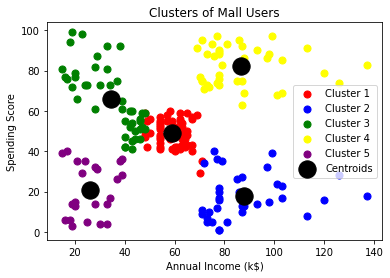

In [24]:
plt.scatter(df.iloc[y_kmeans==0, -2], df.iloc[y_kmeans==0, -1], 
            s=50, c='red', label='Cluster 1')
plt.scatter(df.iloc[y_kmeans==1, -2], df.iloc[y_kmeans==1, -1],
            s=50, c='blue', label='Cluster 2')
plt.scatter(df.iloc[y_kmeans==2, -2], df.iloc[y_kmeans==2, -1],
            s=50, c='green', label='Cluster 3')
plt.scatter(df.iloc[y_kmeans==3, -2], df.iloc[y_kmeans==3, -1],
           s=50, c='yellow', label='Cluster 4')
plt.scatter(df.iloc[y_kmeans==4, -2], df.iloc[y_kmeans==4, -1],
           s=50, c='purple', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, -2], kmeans.cluster_centers_[:, -1],
            s=300, c='black', label='Centroids')
plt.title('Clusters of Mall Users')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Analysis

* Purple Cluster: groups people with decent salaries who spend a lot.
* Green Cluster: groups people salary isn't pretty high and their spending score is moderate.
* Red Cluster: groups people who actually have pretty good salaries and barely spend money.
* Yellow Cluster: groups people with moderate to high annual salaries who actually spend between moderate to a lot of their income.
* Blue Cluster:  groups people with moderate to high annual salaries but don't spend much money in stores.